In [2]:
# Copyright (C) 2016-2018 by Jakob J. Kolb at Potsdam Institute for Climate
# Impact Research
#
# Contact: kolb@pik-potsdam.de
# License: GNU AGPL Version 3
%matplotlib inline
#import PyDSTool as pdt
import numpy as np
import networkx as nx
from random import shuffle
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from pydivest.macro_model.integrate_equations_aggregate import IntegrateEquationsAggregate as MacroModel
from pydivest.micro_model.divestmentcore import DivestmentCore as MicroModel
from pydivest.default_params import ExperimentDefaults 

from pymofa.experiment_handling import even_time_series_spacing


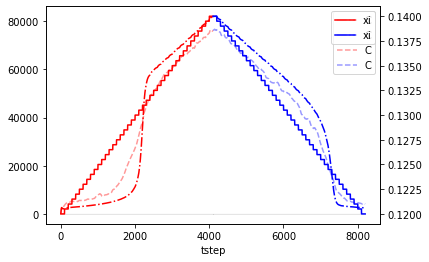

In [25]:
path = "../output_data/X7/mean_trj.h5"
path_err = "../output_data/X7/std_trj.h5"

with pd.HDFStore(path) as store:
    data1 = store.select('dat_0')
    data2 = store.select('dat_1')
    
with pd.HDFStore(path_err) as store:
    data1_err = store.select('dat_0')
    data2_err = store.select('dat_1')

# print(len(data1.index.levels[5]))
# print(len(data2.index.levels[5]))

# t_n = 100
# xis1 = []
# xis2 = []
# data_points = 51
# xi_min = 0.1
# xi_max = 0.2
# for xi1, xi2 in zip(np.linspace(xi_min, xi_max, data_points), np.linspace(xi_max, xi_min, data_points)):
#     xis1 += [xi1]*t_n
#     xis2 += [xi2]*t_n*2
    
# print(len(xis1))
# print(len(xis2))
    
# data1['xi'] = xis1 + xis1
# data2['xi'] = xis2 + xis2

d_sets = [data1, data2, data1_err, data2_err]
for d in d_sets:
    d.index = d.index.droplevel([0,1,3,4])
data1.head()

fig, ax = plt.subplots()

data1.xs(level='approx', key=1)[['C']].plot(style='r-.', ax=ax)
data2.xs(level='approx', key=1)[['C']].plot(style='b-.', ax=ax)

data1.xs(level='approx', key=0)[['C']].plot(style='r--', ax=ax, alpha=0.4)
data2.xs(level='approx', key=0)[['C']].plot(style='b--', ax=ax, alpha=0.4)

axb = ax.twinx()

data1.xs(level='approx', key=1)[['xi']].plot(style='r-', ax=axb)
data2.xs(level='approx', key=1)[['xi']].plot(style='b-', ax=axb)

def plt_err(dta, dtb, obs, ax, color='k'):
    t = dta.xs(level='approx', key=0).index.values
    x = dta.xs(level='approx', key=0)[[obs]].T.values[0]
    dx = dtb.xs(level='approx', key=0)[[obs]].T.values[0]
    ax.fill_between(t, x+dx, x-dx, alpha=0.1, color=color)

plt_err(data1, data1_err, 'x', ax)
plt_err(data2, data2_err, 'x', ax)

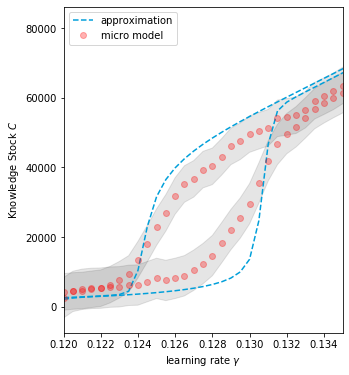

In [41]:
green  = '#69923A'
blue = '#009FDA'
grey = '#8E908F'
orange = '#E37222'

colors = [blue, orange]

fig, ax = plt.subplots(figsize=(5, 6))

data1.xs(level='approx', key=1).groupby('xi').mean()[['C']].plot(style='--', ax=ax, color=blue)
data2.xs(level='approx', key=1).groupby('xi').mean()[['C']].plot(style='--', ax=ax, legend=False, color=blue)

data1.xs(level='approx', key=0).groupby('xi').mean()[['C']].plot(style='ro', ax=ax, alpha=.3, legend=False)
data2.xs(level='approx', key=0).groupby('xi').mean()[['C']].plot(style='ro', ax=ax, alpha=.3)

dta = data1.groupby(['xi', 'approx']).mean()
dtb = data1_err.groupby(['xi', 'approx']).mean()
plt_err(dta, dtb, 'C', ax, color='k')

dta = data2.groupby(['xi', 'approx']).mean()
dtb = data2_err.groupby(['xi', 'approx']).mean()
plt_err(dta, dtb, 'C', ax, color='k')

h,l = ax.get_legend_handles_labels()
ax.legend([h[1], h[3]],["approximation", "micro model"], loc=2)

ax.set_xlabel(r'learning rate $\gamma$')
ax.set_ylabel(r'Knowledge Stock $C$')

ax.set_xlim([.12, .135])
dta.head()

fig.savefig('hysteresis_C.pdf')

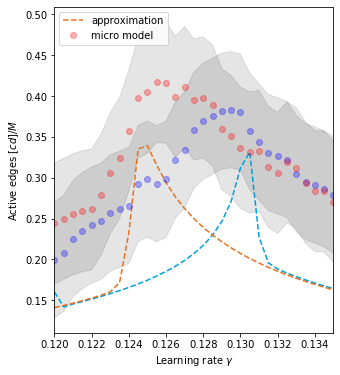

In [44]:
green  = '#69923A'
blue = '#009FDA'
grey = '#8E908F'
orange = '#E37222'

colors = [blue, orange]

fig, ax = plt.subplots(figsize=(5, 6))

data1.xs(level='approx', key=1).groupby('xi').mean()[['z']].plot(style='--', ax=ax, color=blue)
data2.xs(level='approx', key=1).groupby('xi').mean()[['z']].plot(style='--', ax=ax, legend=False, color=orange)

data1.xs(level='approx', key=0).groupby('xi').mean()[['z']].plot(style='bo', ax=ax, alpha=.3, legend=False)
data2.xs(level='approx', key=0).groupby('xi').mean()[['z']].plot(style='ro', ax=ax, alpha=.3)

dta = data1.groupby(['xi', 'approx']).mean()
dtb = data1_err.groupby(['xi', 'approx']).mean()
plt_err(dta, dtb, 'z', ax, color='k')

dta = data2.groupby(['xi', 'approx']).mean()
dtb = data2_err.groupby(['xi', 'approx']).mean()
plt_err(dta, dtb, 'z', ax, color='k')

h,l = ax.get_legend_handles_labels()
ax.legend([h[1], h[3]],["approximation", "micro model"], loc=2)

ax.set_xlabel(r'Learning rate $\gamma$')
ax.set_ylabel(r'Active edges $[cd]/M$')

ax.set_xlim([.12, .135])
dta.head()

fig.savefig('hysteresis_z.pdf')